In [1]:
import numpy as np
import h5py
import scipy.io as sio

import matplotlib.pyplot as plt
import pandas as pd

import os

from spike import *

%load_ext autoreload
%autoreload 2

# simulation of independent spike trains

P(A)= 0.095
P(B)= 0.20833333333333334
P(A and B)= 0.02


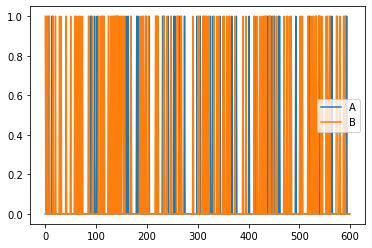

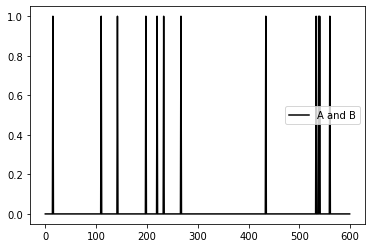

In [2]:
# generate independent spike trains with different probabilities of spike
prob_A = 0.1
prob_B = 0.2

train_A = np.random.rand(600) < prob_A
train_B = np.random.rand(600) < prob_B

train_A_and_B = train_A * train_B

# print probabilities
print("P(A)=",np.mean(train_A>0))
print("P(B)=",np.mean(train_B>0))
print("P(A and B)=",np.mean(train_A_and_B))

plt.figure()
plt.plot(train_A)
plt.plot(train_B)
plt.legend(["A","B"])

plt.figure()
plt.plot(train_A_and_B, 'k')
plt.legend(["A and B"])

# Real data (mouse)

## load data

In [3]:

folder_name = "data/mouse"
channel_names = ["44a","45a"]
    
spike_times = load_spike_times(folder_name, channel_names)

<BarContainer object of 257 artists>

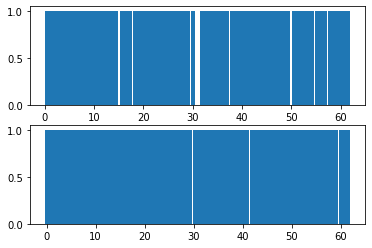

In [4]:
plt.subplot(211)
plt.bar(spike_times[0], 1)
plt.subplot(212)
plt.bar(spike_times[1], 1)

## calc & plot inter-spike intervals

0.22045391304347828 0.2616390800996914
Cv= 0.8425878617195853
0.23953375000000002 0.20714587839476173
Cv= 1.156352961768885


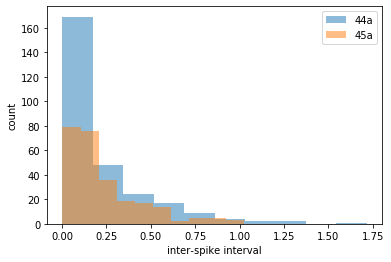

In [5]:
isi = [np.diff(spike_times[0]), np.diff(spike_times[1])]

print(np.mean(isi[0]), np.std(isi[0]))
print("Cv=", np.mean(isi[0]) / np.std(isi[0]))
print(np.mean(isi[1]), np.std(isi[1]))
print("Cv=", np.mean(isi[1]) / np.std(isi[1]))

plt.hist(isi[0], alpha=0.5)
plt.hist(isi[1], alpha=0.5)
plt.xlabel('inter-spike interval')
plt.ylabel('count')
plt.legend(channel_names)

## convert spike times to spike trains with the same length

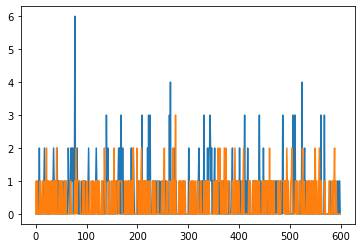

In [6]:
# dt = 0.01 # 10 ms
dt = 0.1  # 100 ms
max_time = 60

spike_trains = list()
for sp in spike_times:
    spike_trains.append(convert_time_to_train(sp, max_time, dt))

plt.plot(spike_trains[0])
plt.plot(spike_trains[1])

## check simultaneous spikes

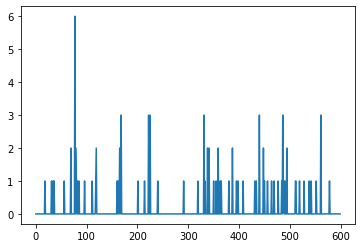

In [7]:
spike_train_both = spike_trains[0]*spike_trains[1]

plt.plot(spike_train_both)


## binary spike model
* ignores multiple spikes in a bin
* works only for small dt

In [8]:
prob_A = np.mean(spike_trains[0]>0) # frequency of spike
prob_B = np.mean(spike_trains[1]>0) # frequency of spike

print("P(A)=", prob_A)
print("P(B)=", prob_B)
print("P(A)*P(B)=", prob_A*prob_B)

prob_A_and_B = np.mean(spike_train_both>0) # frequency of simultaneous spokes

print("P(A and B)=", prob_A_and_B)

P(A)= 0.3233333333333333
P(B)= 0.375
P(A)*P(B)= 0.12125
P(A and B)= 0.10833333333333334


## multiple spike model
* use multiple spikes in a bin as weights
* works only for small dt

In [9]:
prob_A = np.mean(spike_trains[0]) # frequency of spike
prob_B = np.mean(spike_trains[1]) # frequency of spike

print("P(A)=", prob_A)
print("P(B)=", prob_B)
print("P(A)*P(B)=", prob_A*prob_B)

prob_A_and_B = np.mean(spike_train_both) # frequency of simultaneous spokes

print("P(A and B)=", prob_A_and_B)

P(A)= 0.445
P(B)= 0.4166666666666667
P(A)*P(B)= 0.18541666666666667
P(A and B)= 0.15666666666666668


# Real data (monkey)

In [10]:
folder_name = "data/monkey"
channel_names = ["57a","58a"]
    
spike_times = load_spike_times(folder_name, channel_names)

In [11]:
spike_times[0][-1]

182.05284

In [12]:
spike_times[1][-1]

182.00172

## calc & plot inter-spike intervals

0.06911202733485194 0.053266777110370735
Cv= 1.2974696627815356
0.23440752577319587 0.25471301652786354
Cv= 0.9202809066004429


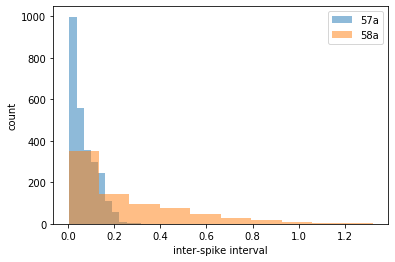

In [13]:
isi = [np.diff(spike_times[0]), np.diff(spike_times[1])]

print(np.mean(isi[0]), np.std(isi[0]))
print("Cv=", np.mean(isi[0]) / np.std(isi[0]))
print(np.mean(isi[1]), np.std(isi[1]))
print("Cv=", np.mean(isi[1]) / np.std(isi[1]))

plt.hist(isi[0], alpha=0.5)
plt.hist(isi[1], alpha=0.5)
plt.xlabel('inter-spike interval')
plt.ylabel('count')
plt.legend(channel_names)

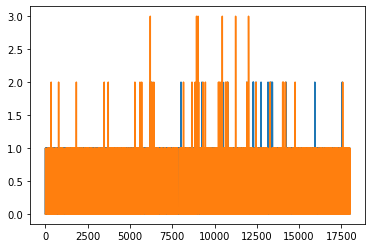

In [14]:
dt = 0.01 # 10 ms
# dt = 0.1  # 100 ms   # TOO WIDE!
max_time = 180

spike_trains = list()
for sp in spike_times:
    spike_trains.append(convert_time_to_train(sp, max_time, dt))

plt.plot(spike_trains[0])
plt.plot(spike_trains[1])

## binary spike model
* ignores multiple spikes in a bin
* works only for small dt

In [15]:
prob_A = np.mean(spike_trains[0]>0) # frequency of spike
prob_B = np.mean(spike_trains[1]>0) # frequency of spike

print("P(A)=", prob_A)
print("P(B)=", prob_B)
print("P(A)*P(B)=", prob_A*prob_B)

prob_A_and_B = np.mean(spike_train_both>0) # frequency of simultaneous spokes

print("P(A and B)=", prob_A_and_B)

P(A)= 0.14366666666666666
P(B)= 0.03911111111111111
P(A)*P(B)= 0.005618962962962963
P(A and B)= 0.10833333333333334


## multiple spike model
* use multiple spikes in a bin as weights
* works only for small dt

In [16]:
prob_A = np.mean(spike_trains[0]) # frequency of spike
prob_B = np.mean(spike_trains[1]) # frequency of spike

print("P(A)=", prob_A)
print("P(B)=", prob_B)
print("P(A)*P(B)=", prob_A*prob_B)

prob_A_and_B = np.mean(spike_train_both) # frequency of simultaneous spokes

print("P(A and B)=", prob_A_and_B)

P(A)= 0.14472222222222222
P(B)= 0.042833333333333334
P(A)*P(B)= 0.006198935185185186
P(A and B)= 0.15666666666666668
